In [29]:
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #for plot styling

In [5]:
df=pd.read_csv('mall_customer.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
df1 = df[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [22]:
from sklearn.cluster import KMeans
Kmean=KMeans(n_clusters=2)
Kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
centers = Kmean.cluster_centers_
print(centers)

[[28.95294118 62.17647059 73.62352941]
 [46.16521739 59.36521739 32.88695652]]


In [31]:
Kmean.labels_

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [24]:
#k means clustering in an iteration 1 till 20 cluster size
cluster_range = range(1,10)
cluster_errors = []

for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(df1)
    cluster_errors.append(clusters.inertia_)

In [25]:
#WSS
import pandas as pd
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,308812.780000
1,2,212840.169821
2,3,143342.751572
3,4,104366.151456
4,5,75350.779172
5,6,58300.443322
6,7,51082.542968
7,8,44307.873417
8,9,41184.508907


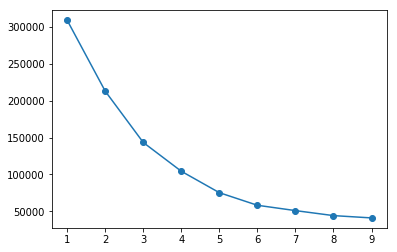

In [26]:
#elbow graph
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker='o')